**SUBMISSION INSTRUCTIONS**

It is recommendend that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, **RENAME** the file as **rollno_name.ipynb**

**Submission Deadline : 9/12/2025 Tuesday EOD i.e before 11:59 PM**

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week0

**Github Submission repo** -
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week0

#**Assignment 1**
#**Section 1 (Python)**
#**Problem 1**
In this problem, you will implement a class that represents a data sample with numerical features.  
##  Problem Statement
Create a class named **`DataSample`** that stores:

- A list of numeric **features**
- A string **label**

You must implement the following **three methods** with **exact names** (do NOT rename them):

| Method | Description |
|--------|------------|
| `__init__(self, features, label)` | Initializes object attributes |
| `min_max_norm(self)` | Apply min-max normalization **in-place** |
| `scaled(self, factor)` | Return a **new list** with each feature multiplied by `factor` |

### Min–Max Normalization Formula

![Alt text for the image](https://miro.medium.com/v2/resize:fit:964/1*OnCBKS-Thqa43qNslohDpA.png)


###  Edge Case
If **all features are equal**, then max = min → division by zero.  
Handle this condition by setting all normalized values to **0**.

---

### Your output must behave conceptually like this (not real execution here):
```python
sample = DataSample([10, 20, 30], "cat")
sample.min_max_norm()
print(sample.features)   # expected -> [0.0, 0.5, 1.0]

print(sample.scaled(2))  # expected -> [0.0, 1.0, 2.0]


**Sample Class**

In [ ]:
class DataSample:
    def __init__(self, features, label):
        self.features = features
        self.label = label

    def min_max_norm(self):
        if not self.features:
            return

        min_val = min(self.features)
        max_val = max(self.features)

        if max_val == min_val:
            self.features = [0.0] * len(self.features)
        else:
            self.features = [(x - min_val) / (max_val - min_val) for x in self.features]

    def scaled(self, factor):
        return [x * factor for x in self.features]

You can check if your code is working correctly using the sample case below

In [68]:
sample = DataSample([3.5, -2.0, 3.5, 10.0, 0.0], "bird")

print("Original features:", sample.features)
print("Label:", sample.label)

sample.min_max_norm()
print("After min-max normalization:", sample.features)

scaled_output = sample.scaled(4.2)
print("After scaling x 4.2 (new list expected):", scaled_output)

# Expected Output:
# Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
# Label: bird
# After min-max normalization: [0.4583, 0.0, 0.4583, 1.0, 0.1667]  (approx values)
# After scaling x 4.2: [1.92486, 0.0, 1.92486, 4.2, 0.70014]

Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
Label: bird
After min-max normalization: [0.4583333333333333, 0.0, 0.4583333333333333, 1.0, 0.16666666666666666]
After scaling x 4.2 (new list expected): [1.925, 0.0, 1.925, 4.2, 0.7]


#**Problem 2**
Sort Based on Unique Character Count

Write a function named **`sort_by_unique_chars`** that sorts a list of strings based on the number of **unique characters** in each string (**descending** order).  
If two strings have the same number of unique characters, sort them **alphabetically**.

Assume that the characters in the words are only consisting of lower-case english alphabets

### Function Definition (DO NOT CHANGE THIS NAME)

```python
def sort_by_unique_chars(words):
    pass

In [ ]:
def sort_by_unique_chars(words):
  return sorted(words, key=lambda word: (-len(set(word)), word))

check your code by running the below block

In [ ]:
#example case
input_data = ["apple", "banana", "kiwi", "grape", "mango"]
output = sort_by_unique_chars(input_data)
print(output)
# Expected Output:
# ['grape', 'mango', 'apple', 'banana', 'kiwi']

# **Section 2 (NumPy)**
# **Problem 1**

In this problem, you will work with NumPy arrays to practice masking, slicing, advanced indexing, and broadcasting. Follow each step sequentially using only NumPy operations (no Python loops).

## **Problem Statement**

1. **Generate** a 10×10 NumPy array `X` containing random integers between **0 and 100** (inclusive).

2. Create a **boolean mask** selecting all values between **20 and 50** (inclusive).   
   Using this mask, replace those values in `X` with **−1** *in-place*.

3. Extract a **6×6 submatrix** `sub` from the modified `X`:
   - Rows **2 to 8** ( 8 excluded )
   - Columns **3 to 9** ( 9 excluded )

4. Using **advanced NumPy indexing**, extract all **diagonal elements** of the 6×6 submatrix `sub` into a 1D array `diag_vals`.  
   *Hint: use* `np.arange(6)`.

5. Construct a **10×10 structured matrix** `M` using broadcasting, where:

    `M[i, j] = (i - j)²`

    for all `0 ≤ i, j < 10`. This must be done **without loops**.


In [73]:
import numpy as np

X = np.random.randint(0, 101, size=(10, 10))
print("1. Original X:\n", X, "\n")

mask = (X >= 20) & (X <= 50)
X[mask] = -1
print("2. X after masking:\n", X, "\n")

sub = X[2:8, 3:9]
print("3. Extracted 6x6 submatrix:\n", sub, "\n")

indices = np.arange(6)
diag_vals = sub[indices, indices]
print("4. Diagonal elements of submatrix:\n", diag_vals, "\n")

i = np.arange(10).reshape(10, 1) # Column vector
j = np.arange(10).reshape(1, 10) # Row vector
M = (i - j)**2
print("5. Constructed 10x10 matrix M:\n", M)

1. Original X:
 [[ 39   8  13   7  80  22  79  89   8  99]
 [  6  81  71  84  89  66  60  16  56  23]
 [ 24   4 100  49  87  30  54  25  20  97]
 [ 57  23  27  29  33  53  51  86   7   9]
 [ 54   0  83  36  81  20   3  42  65  20]
 [ 36  68  80  47  10  94  91  43  63  31]
 [ 20  70   9  60  91  35  83  76  18  74]
 [ 98  97  43   3  12 100  58   1   0  39]
 [ 24  58  36  99  69   6   3  98  40  60]
 [ 33  28  68  26  96  51  73  53  69  33]] 

2. X after masking:
 [[ -1   8  13   7  80  -1  79  89   8  99]
 [  6  81  71  84  89  66  60  16  56  -1]
 [ -1   4 100  -1  87  -1  54  -1  -1  97]
 [ 57  -1  -1  -1  -1  53  51  86   7   9]
 [ 54   0  83  -1  81  -1   3  -1  65  -1]
 [ -1  68  80  -1  10  94  91  -1  63  -1]
 [ -1  70   9  60  91  -1  83  76  18  74]
 [ 98  97  -1   3  12 100  58   1   0  -1]
 [ -1  58  -1  99  69   6   3  98  -1  60]
 [ -1  -1  68  -1  96  51  73  53  69  -1]] 

3. Extracted 6x6 submatrix:
 [[ -1  87  -1  54  -1  -1]
 [ -1  -1  53  51  86   7]
 [ -1  81  -1 

# **Problem 2**

In this problem, you will work with NumPy arrays representing class scores for multiple samples.
You will practice row-wise normalization, broadcasting, and boolean masking.

## **Problem Statement**

1. Create a NumPy array `scores` of shape 5×4 containing integer values between **0 and 20** (inclusive).  
   Each row represents a sample, and each column represents a score for one of the 4 classes.

2. For each row in `scores`, subtract the **maximum value of that row** from all elements in that row.  
   This operation must be performed using **broadcasting** (no loops allowed).

   *Hint:*  
   `scores.max(axis=1, keepdims=True)` produces a (5×1) column of row-wise maxima.

3. Compute a new array `exp_scores` by applying the exponential function to each element:

   `exp_scores = np.exp(shifted_scores)`

4. **Normalize each row** of `exp_scores` so that each row sums to **1**.  
   Store the resulting array in `probs`.  

   The transformation is conceptually shown by the formula:

   <img src="https://miro.medium.com/v2/resize:fit:300/1*bol3L-WNVacCscvG-rlypQ.png" width="250"/>

   Which corresponds to:

   `probs[i, j] = exp_scores[i, j]/sum(exp_scores[i, :])`

5. Compute the **predicted class** for each sample by taking the index of the largest value in each row of `probs`.  
   Store this in a 1D array `y_pred` of length 5.

6. Create a NumPy array `y_true` of length 5 containing the true class labels (each between 0 and 3).

7. Create a boolean array `correct_mask` indicating whether each predicted label matches the true label.  
   Then compute the **accuracy** using:

   `accuracy = correct_mask.mean()`


In [74]:
import numpy as np

np.random.seed(0)

scores = np.random.randint(0, 21, size=(5, 4))
print("scores (5x4):\n", scores, "\n")

shifted_scores = scores - scores.max(axis=1, keepdims=True)
print("shifted_scores (row-wise max subtracted):\n", shifted_scores, "\n")

exp_scores = np.exp(shifted_scores)
print("exp_scores:\n", exp_scores, "\n")

probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
print("probs (softmax, row sums = 1):\n", probs, "\n")
print("Row sums (should be 1):", probs.sum(axis=1), "\n")

y_pred = probs.argmax(axis=1)
print("y_pred (predicted class indices):", y_pred, "\n")

y_true = np.array([2, 1, 3, 0, 2])
print("y_true (true class indices):", y_true, "\n")

correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()
print("correct_mask:", correct_mask)
print("accuracy:", accuracy)

scores (5x4):
 [[12 15  0  3]
 [ 3  7  9 19]
 [18  4  6 12]
 [ 1  6  7 14]
 [17  5 13  8]] 

shifted_scores (row-wise max subtracted):
 [[ -3   0 -15 -12]
 [-16 -12 -10   0]
 [  0 -14 -12  -6]
 [-13  -8  -7   0]
 [  0 -12  -4  -9]] 

exp_scores:
 [[4.97870684e-02 1.00000000e+00 3.05902321e-07 6.14421235e-06]
 [1.12535175e-07 6.14421235e-06 4.53999298e-05 1.00000000e+00]
 [1.00000000e+00 8.31528719e-07 6.14421235e-06 2.47875218e-03]
 [2.26032941e-06 3.35462628e-04 9.11881966e-04 1.00000000e+00]
 [1.00000000e+00 6.14421235e-06 1.83156389e-02 1.23409804e-04]] 

probs (softmax, row sums = 1):
 [[4.74255818e-02 9.52568274e-01 2.91392845e-07 5.85278176e-06]
 [1.12529362e-07 6.14389498e-06 4.53975847e-05 9.99948346e-01]
 [9.97520436e-01 8.29466890e-07 6.12897738e-06 2.47260595e-03]
 [2.25750841e-06 3.35043955e-04 9.10743895e-04 9.98751955e-01]
 [9.81888870e-01 6.03293373e-06 1.79839220e-02 1.21174713e-04]] 

Row sums (should be 1): [1. 1. 1. 1. 1.] 

y_pred (predicted class indices): [1 3 0 3

#Section 3 - Pandas and MatPlotLib


#Creating Batches for Training and Testing Using Pandas

Download the following .csv file from the given link directly using commands in colab - url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

In [ ]:
!wget https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv

In [ ]:
import pandas as pd

Import the csv file as a dataframe

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

Write the command to be able to see the first 5 rows

In [ ]:
df.head()

Create multiple dataframes with the following columns sorted : gender, race, math, reading and writing scores.

(meaning create df1, df2, df3 etc. with the math score sorted in df1, gender wise sorted in df2 etc.)

In [75]:
# gender
df_gender = df.sort_values(by="gender")

In [76]:
# race/ethnicity
df_race = df.sort_values(by="race/ethnicity")

In [77]:
# math
df_math = df.sort_values(by="math score")

In [78]:
# reading
df_reading = df.sort_values(by="reading score")

In [79]:
# writing
df_writing = df.sort_values(by="writing score")

Create 2 non-overlapping dataframes test_df and train_df such that 20% of the rows are in test_df and the rest in train_df

In [80]:
df_shuffled = df.sample(frac=1, random_state=42)

test_size = int(0.20 * len(df))

test_df = df_shuffled.iloc[:test_size]
train_df = df_shuffled.iloc[test_size:]

In [81]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head(), test_df.head()

Train shape: (800, 8)
Test shape: (200, 8)


(     gender race/ethnicity parental level of education         lunch  \
 29   female        group D             master's degree      standard   
 535  female        group C           bachelor's degree  free/reduced   
 695  female        group D                some college  free/reduced   
 557    male        group C             master's degree  free/reduced   
 836    male        group E                 high school      standard   
 
     test preparation course  math score  reading score  writing score  
 29                     none          62             70             75  
 535               completed          66             83             83  
 695                    none          79             89             86  
 557                    none          61             67             66  
 836                    none          73             64             57  ,
      gender race/ethnicity parental level of education         lunch  \
 521  female        group C          associate's

Plot a bar graph such that you can see the distribution of race in test and train dataset. Are the proportions of races almost same in train and test datasets ? If not what can you do so that the proportions of races in the test and train datasets are close ?


Hint : Think Sorting on the race/ethnicity column and then applying some logic.

In [82]:
# to clarify if the split of races A, B, C, D and E are nearly say 0.2, 0.15, 0.25, 0.17, 0.23
# then I expect an almost similar split in the train_df and test_df

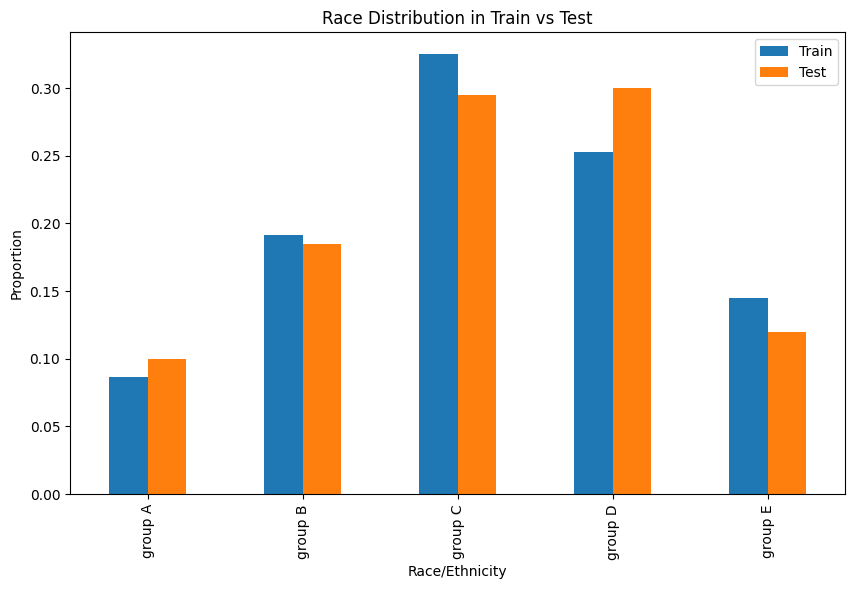

In [83]:
import matplotlib.pyplot as plt

train_counts = train_df['race/ethnicity'].value_counts(normalize=True)
test_counts  = test_df['race/ethnicity'].value_counts(normalize=True)

race_dist = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts
}).sort_index()

race_dist.plot(kind='bar', figsize=(10, 6))
plt.title("Race Distribution in Train vs Test")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Proportion")
plt.legend()
plt.show()

Even if it the proportions are almost same think of a way to create the train_df and test_df to have similar proportions of races.

In [84]:
test_parts = []
train_parts = []

for value, group in df.groupby('race/ethnicity'):
    n_test = int(0.20 * len(group))
    if n_test == 0:
        n_test = 1

    grp_shuffled = group.sample(frac=1, random_state=42)
    test_parts.append(grp_shuffled.iloc[:n_test])
    train_parts.append(grp_shuffled.iloc[n_test:])

test_df = pd.concat(test_parts).sample(frac=1, random_state=42)
train_df = pd.concat(train_parts).sample(frac=1, random_state=42)

train_props = train_df['race/ethnicity'].value_counts(normalize=True).sort_index()
test_props  = test_df['race/ethnicity'].value_counts(normalize=True).sort_index()
pd.DataFrame({'Train': train_props, 'Test': test_props})

,Train,Test
race/ethnicity,,
group A,0.089776,0.085859
group B,0.189526,0.191919
group C,0.319202,0.318182
group D,0.261845,0.262626
group E,0.139651,0.141414


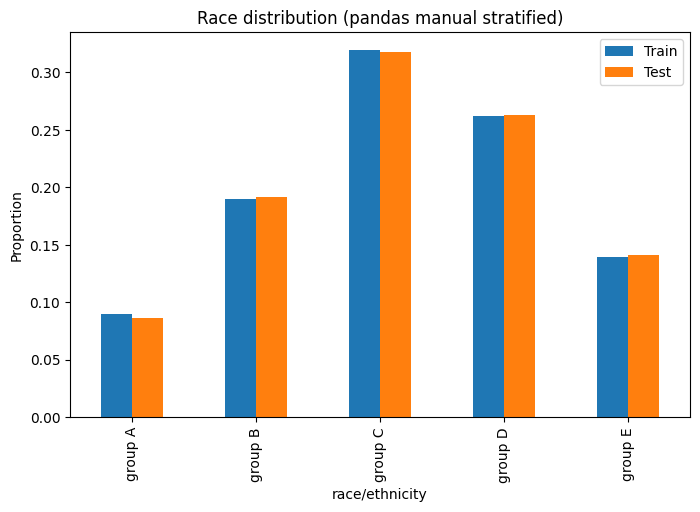

In [85]:
pd.DataFrame({'Train': train_props, 'Test': test_props}).plot(kind='bar', figsize=(8,5))
plt.title("Race distribution (pandas manual stratified)")
plt.ylabel("Proportion")
plt.show()

Usually when we train machine learning models we use batches. Each batch is a subset of train_df of legth batch_size. Create Batches: a list of batch each of size 50 from the train_df

In [86]:
batch_size = 50

In [87]:
batches = [train_df.iloc[i : i + batch_size]
           for i in range(0, len(train_df), batch_size)]

Print the size of Batches and first few rows of Batches[0]

In [88]:
print("Number of batches:", len(batches))

print("\nFirst few rows of Batches[0]:")
print(batches[0].head())

Number of batches: 17

First few rows of Batches[0]:
     gender race/ethnicity parental level of education         lunch  \
219    male        group B            some high school      standard   
278  female        group C            some high school  free/reduced   
218    male        group B                 high school  free/reduced   
920    male        group D                 high school  free/reduced   
130    male        group D             master's degree      standard   

    test preparation course  math score  reading score  writing score  
219               completed          61             56             56  
278                    none          65             86             80  
218                    none          66             77             70  
920                    none          69             70             67  
130                    none          89             84             82  
